In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# sistemas de ecuaciones lineales (simbolico o numerico)
# ejemplo
#Simbolicamente
A = sp.Matrix([[2,3],[5,4]])
b = sp.Matrix([4,3])
#Calcula el rango de la matriz
A.rank()
#Numero de condicion
cond = A.condition_number()
sp.N(cond)
# Norma de la matriz
A.norm()

3*sqrt(6)

In [12]:
#sistemas de ecuaciones lienales(simbolico o numerico)
#ejemplo
#numericamente
A = np.array([[2,3],[5,4]])
b = np.array([4,3])
#rango de la matriz
np.linalg.matrix_rank(A)
# numero de condicion
np.linalg.cond(A)
# norma de la matriz
np.linalg.norm(A)

7.3484692283495345

In [16]:
#solucion de sistemas de ecuaciones
#Forma clasica x = A\b
#factorizaciónes : factorización LU
# AX = b -> (LU)x = b -> L(Ux) = b -> Ly = b si Ux = y
#forma simbolica
A = sp.Matrix([[2,3],[5,4]])
b = sp.Matrix([4,3])
#Descomposicion LU de A
L, U,_ = A.LUdecomposition()
Alu=L*U
#solucion via LU: 
xlu = A.LUsolve(b)
#solucion clasica
x = A.solve(b)

Matrix([
[-1],
[ 2]])

In [21]:
#solucion de sistemas de ecuaciones
#Forma clasica x = A\b
#factorizaciónes : factorización LU
# AX = b -> (LU)x = b -> L(Ux) = b -> Ly = b si Ux = y
#forma numerica.
A = np.array([[1,2],[3,4]])
b = np.array([4,3])
#Descomposicion LU
P,L,U = la.lu(A)
aux = P.dot(L.dot(U))
#solucion numerica
x = la.solve(A,b)

array([-5. ,  4.5])

In [28]:
# ejemplo comparacion numero de condicion vs error relativo para un sistema lineal

p = sp.symbols('p', postive = True)
A = sp.Matrix([[1, sp.sqrt(p)],[1,1/sp.sqrt(p)]])
b = sp.Matrix([4,3])
#solucion simbolica
x = A.solve(b)
x

Matrix([
[        (3*p - 4)/(p - 1)],
[-1/(-sqrt(p) + 1/sqrt(p))]])

TypeError: ignored

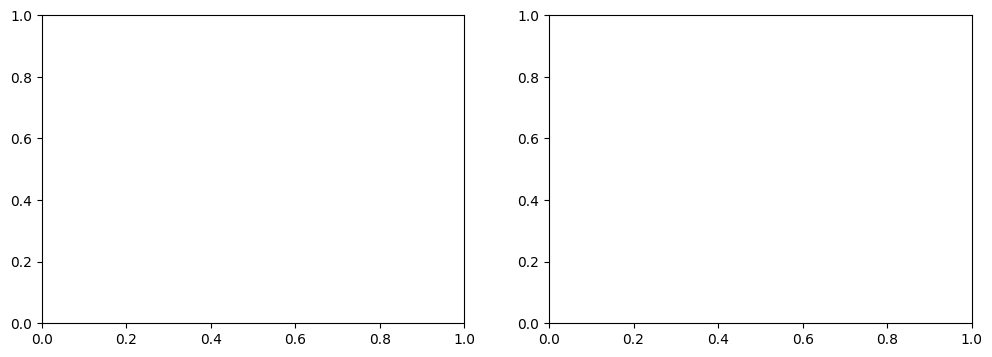

In [49]:
#comparacion entre el calculo simbolico y numerico
p = sp.symbols('p', positive = True)
A = sp.Matrix([[1, sp.sqrt(p)],[1,1/sp.sqrt(p)]])
b = sp.Matrix([1,2])
#Solucion simbolica
x_sym_sol = A.solve(b)
Acond = A.condition_number()
#calculo numerico
AA = lambda p: np.array([[1, sp.sqrt(p)],[1,1/np.sqrt(p)]])
bb = np.array([1,2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

fig, axes = plt.subplots(1,2, figsize = (12,4))
p_vec = np.linspace(0.9,1.1,200)
for n in range(2):
    x_sym = np.array([x_num_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num -x_sym)/x_sym, 'k')
axes[0].see_title('Error en la solucion \n (numerico -simbolico)/simbolico')
axes[0].set_xlabel(r'$p$', fontsize = 18)
axes[1].plot(p_vec, [Acond.subs(p,pp) for pp in p_vec])
axes[1].set_title('Numero de condicion')
axes[1].set_xlabel(r'$p', fontsize = 18)